### In this notebook, we predict student admissions to graduate school based on three pieces of data:

1. GRE Scores (Test)

2. GPA Scores (Grades)

3. Class rank (1-4)


In [86]:
## Loading the data
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('studentData.csv')

# Printing out the first 10 rows of data
# print(data.head(10)) # print(data[:10])

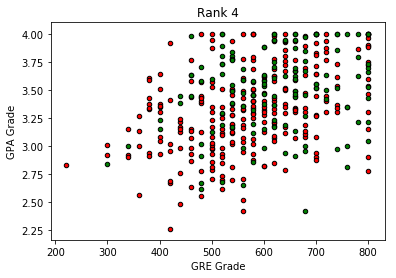

In [43]:
## Plotting the data
# In order to have a 2D plot, we ingore the rank
import matplotlib.pyplot as plt

check=0 #true if we wanna print out for checking

# Function to plot
def plotData(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])

    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 20, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 20, color = 'green', edgecolor = 'k')
    
    plt.ylabel('GPA Grade')
    plt.xlabel('GRE Grade')
    
    if check==1:
        print("X[:5]=\n",X[:5],'\n')
        print("y[:5]=\n",y[:5],'\n')
        print("np.argwhere(y==1)[:5]=\n",np.argwhere(y==1)[:5],'\n')
        print("X[0]=\n",X[0],'\n')
        print("admitted[:5]=\n",admitted[:5])
        
    plt.show()
        
# Plotting the points
plotData(data)

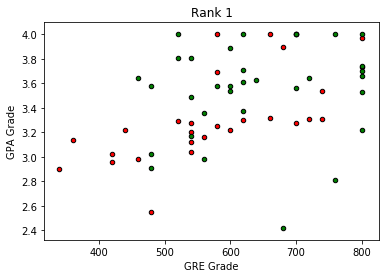

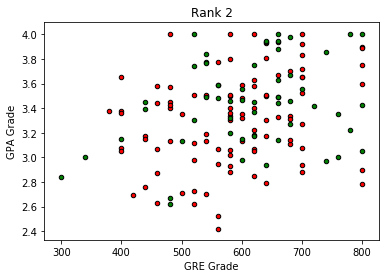

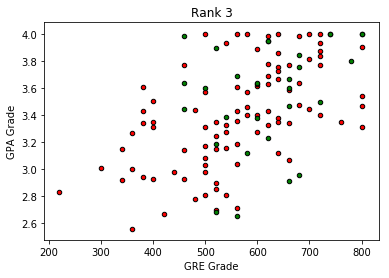

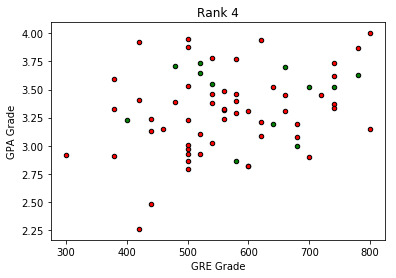

In [87]:
# Separating the ranks and plotting

plt.title("Rank 1")
plotData(data[data["rank"]==1])
plt.title("Rank 2")
plotData(data[data["rank"]==2])
plt.title("Rank 3")
plotData(data[data["rank"]==3])
plt.title("Rank 4")
plotData(data[data["rank"]==4])

In [91]:
# One-hot encoding the ranks
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)
#print(pd.get_dummies(data['rank'], prefix='rank')[:10])

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [92]:
# Scaling the data and Copying our data
processed_data = one_hot_data[:]

# Scaling the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


In [78]:
# Splitting the data into Training and Testing
# with the size of the testing set as 10% of the total data

sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:5])
print(test_data[:5])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
138      0  0.775  0.8500       0       1       0       0
206      0  0.925  0.8850       1       0       0       0
63       1  0.850  0.9625       0       0       1       0
134      0  0.700  0.7375       0       1       0       0
66       0  0.925  0.9050       0       0       0       1
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
0       0  0.475  0.9025       0       0       1       0
47      0  0.625  0.7425       0       0       0       1
57      0  0.475  0.7350       0       0       1       0
68      0  0.725  0.9225       1       0       0       0
88      0  0.875  0.8200       1       0       0       0


In [79]:
# Splitting the data into features(X) and targets(y) (labels)
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print("\n features: \n",features[:10])
print("\n Targets: \n",targets[:10])


 features: 
        gre     gpa  rank_1  rank_2  rank_3  rank_4
138  0.775  0.8500       0       1       0       0
206  0.925  0.8850       1       0       0       0
63   0.850  0.9625       0       0       1       0
134  0.700  0.7375       0       1       0       0
66   0.925  0.9050       0       0       0       1
373  0.775  0.8425       1       0       0       0
346  0.750  0.8375       0       1       0       0
115  0.775  0.9975       0       0       1       0
207  0.800  0.9075       1       0       0       0
175  0.775  0.8425       0       1       0       0

 Targets: 
 138    0
206    0
63     1
134    0
66     0
373    1
346    0
115    0
207    1
175    1
Name: admit, dtype: int64


In [84]:
# Training a 2-layer Neural Network
# Activation (sigmoid) function
def sigmoid(x):
    error = 1 / (1 + np.exp(-x))
    return error
def sigmoid_prime(x):
    error = sigmoid(x) * (1-sigmoid(x))
    return error
def error_formula(y, output):
    error = - y*np.log(output) - (1 - y) * np.log(1-output)
    return error

In [81]:
# Backpropagate the error
def error_term_formula(y, output):
    return (y-output) * output * (1 - output)

In [82]:
# Neural Network 

epochs = 1500       #number of epochs
learnrate = 0.2     #learning rate

# Training function
def Training_function(features, targets, epochs, learnrate):
    
    # seeding to make debugging easier
    np.random.seed(40)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            #   Notice we calulate f'(h) here instead of defining a separate
            #   sigmoid_prime function. This just makes it faster because we
            #   can re-use the result of the sigmoid function stored in
            #   the output variable
            error_term = error_term_formula(y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = Training_function(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.27822297864046003
Epoch: 150
Train loss:  0.2113476450781097
Epoch: 300
Train loss:  0.20896946634422503
Epoch: 450
Train loss:  0.2077181151981475
Epoch: 600
Train loss:  0.20693053778380158
Epoch: 750
Train loss:  0.20641045763756713
Epoch: 900
Train loss:  0.20604627298500058
Epoch: 1050
Train loss:  0.2057746187212538
Epoch: 1200
Train loss:  0.20555932172085858
Epoch: 1350
Train loss:  0.20537940329098298
Finished training!


In [85]:
# Calculating the Accuracy on the Test Data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.5f}".format(accuracy))

Prediction accuracy: 0.70000
